# Teste de Downscaling
Localidade alvo: média aritmética entre quatro estações INMET selecionadas.

Definindo quatro estações próximas para interpolar dados

Interpolar cada dado por dia, criando o dataframe pra locação

Avaliar pelo método o erro inerente na interpolação

            Data  Hora UTC  precTotal  pMed  ...  dirVento  ventoRaj  ventoHor  Unnamed: 19
0     2023/01/01  0000 UTC        NaN   NaN  ...       NaN       NaN       NaN          NaN
1     2023/01/01  0100 UTC        NaN   NaN  ...       NaN       NaN       NaN          NaN
2     2023/01/01  0200 UTC        NaN   NaN  ...       NaN       NaN       NaN          NaN
3     2023/01/01  0300 UTC        NaN   NaN  ...       NaN       NaN       NaN          NaN
4     2023/01/01  0400 UTC        NaN   NaN  ...       NaN       NaN       NaN          NaN
...          ...       ...        ...   ...  ...       ...       ...       ...          ...
8755  2023/12/31  1900 UTC          0 966.6  ...       126       7.1       3.3          NaN
8756  2023/12/31  2000 UTC          0 965.8  ...       115       7.1       3.7          NaN
8757  2023/12/31  2100 UTC          0 965.7  ...       128       6.7       2.9          NaN
8758  2023/12/31  2200 UTC          0 966.6  ...       141       6.4         3  

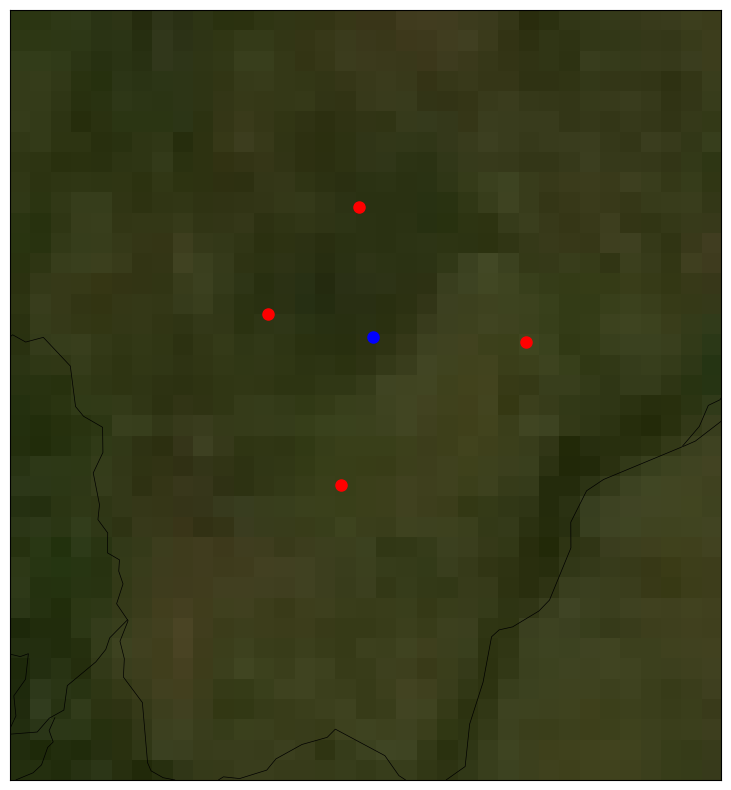

Porcentagem de NaN dos dataframes:
Data                0
Hora UTC            0
precTotal     13.5616
pMed          12.9224
pMax          13.6073
pMin          13.6073
rad                 0
tMed          12.9224
tOrv          12.9795
tMax          13.6073
tMin          13.6073
tOrvMax       13.6644
tOrvMin       13.6644
umidMax       13.6644
umidMin       13.6644
umid          12.9795
dirVento      13.0479
ventoRaj      13.8242
ventoHor      13.0479
Unnamed: 19       100
dtype: float64
16.60958904109589


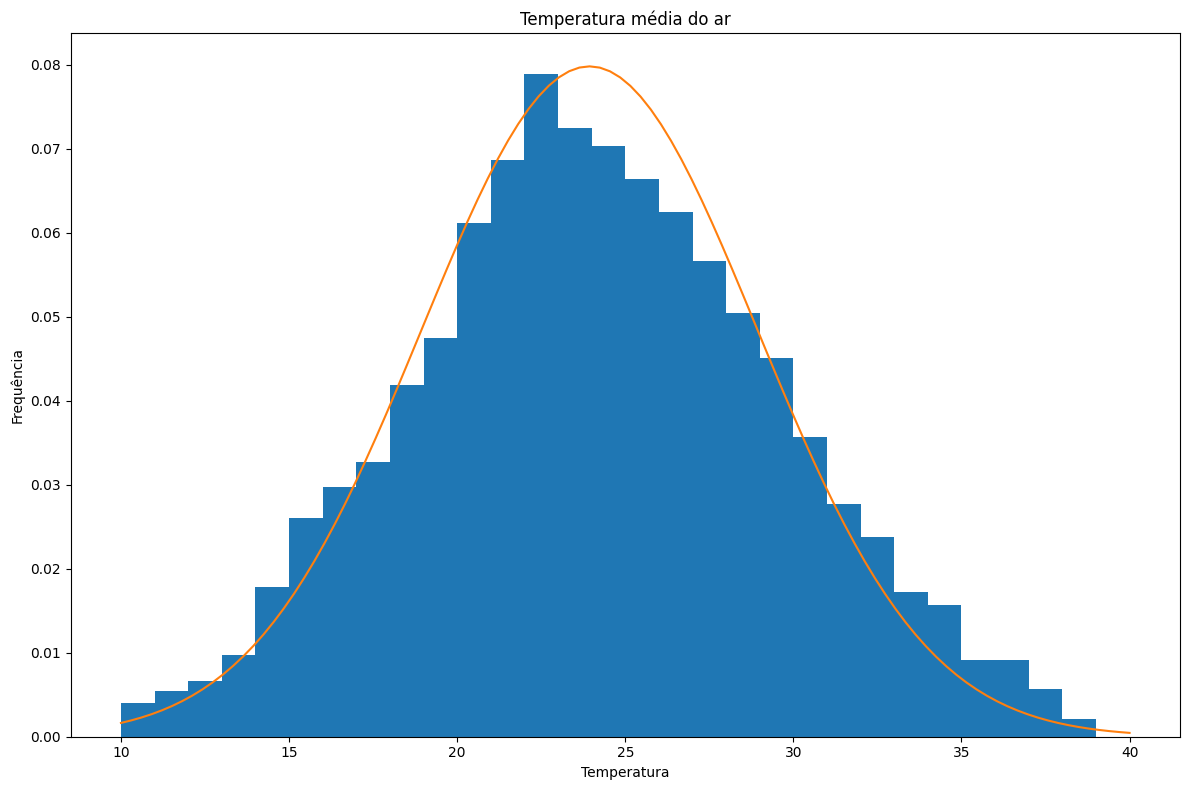

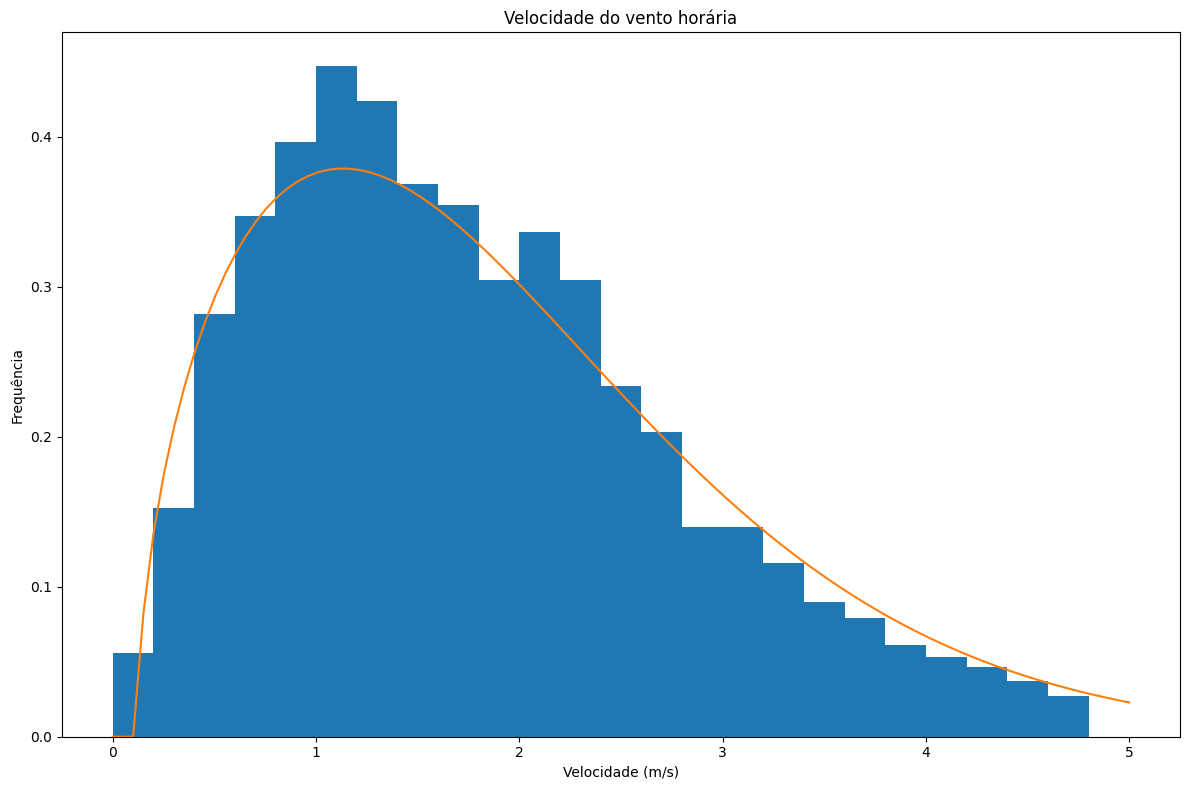

       tMed  vMed  radMed   tCond
0       NaN   NaN       0     NaN
1       NaN   NaN       0     NaN
2       NaN   NaN       0     NaN
3       NaN   NaN       0     NaN
4       NaN   NaN       0     NaN
...     ...   ...     ...     ...
8755   30.3  3.05 629.493 34.7357
8756 30.225  2.95 549.875 34.1885
8757 29.275  2.05 227.201  31.362
8758  28.35   1.5 62.7153 29.0532
8759   26.9 1.975 3.67361 26.9346

[8760 rows x 4 columns]


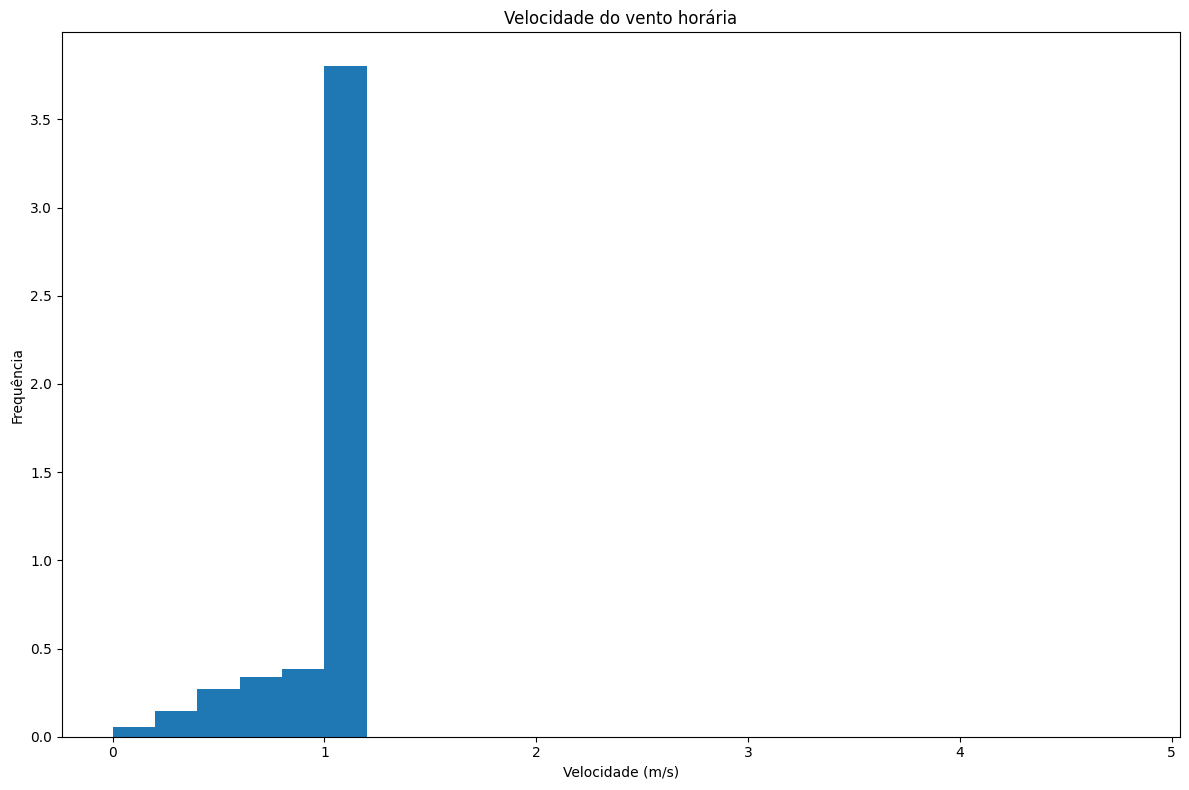

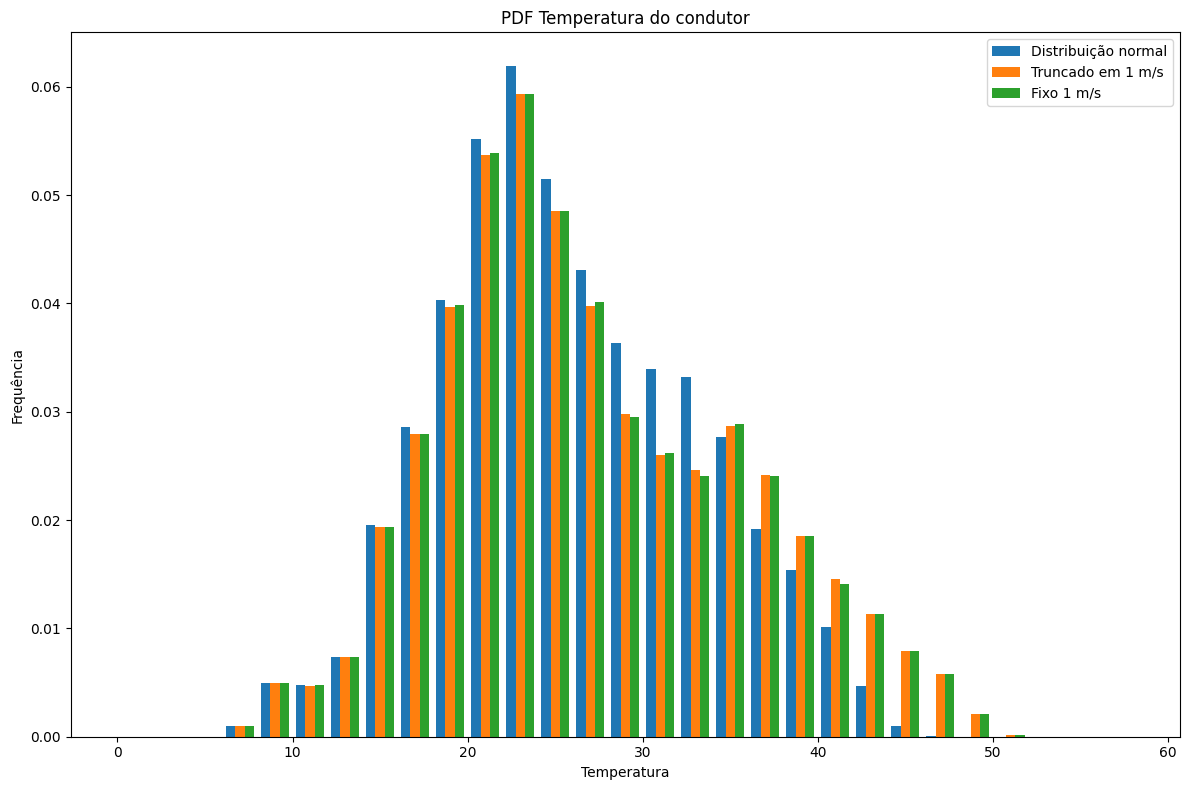

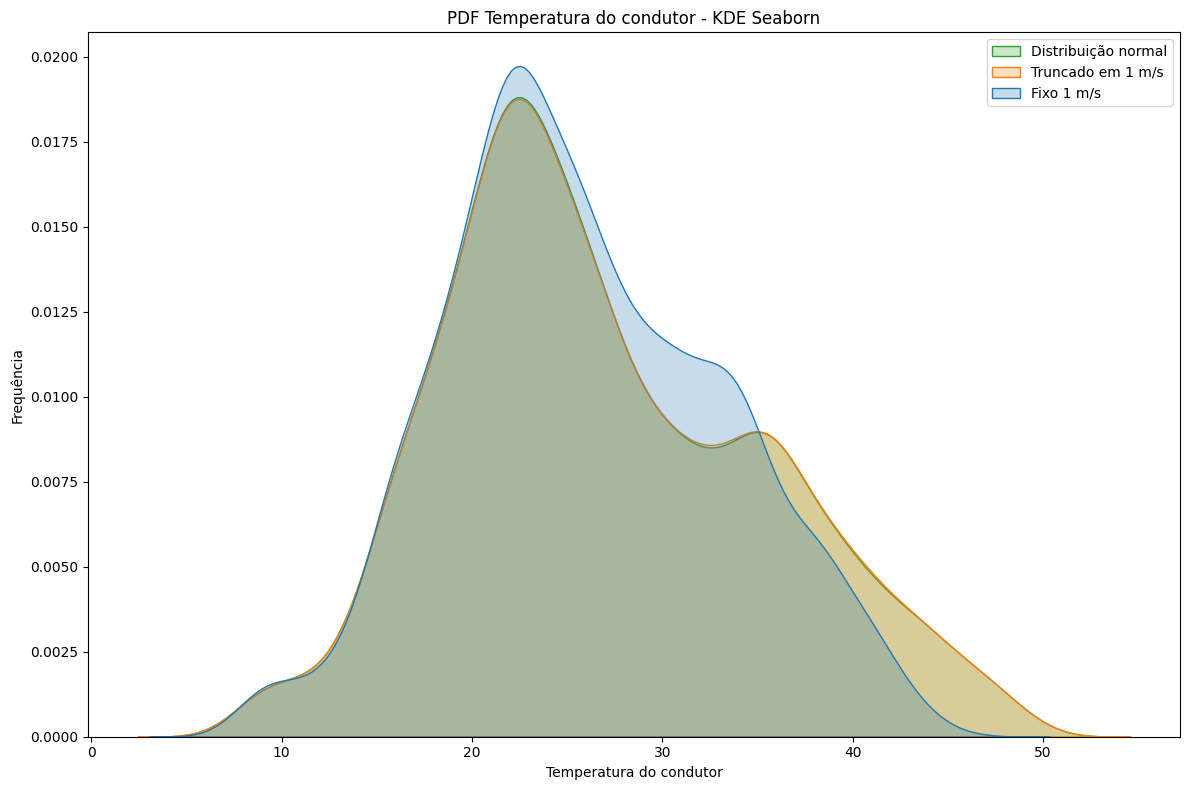

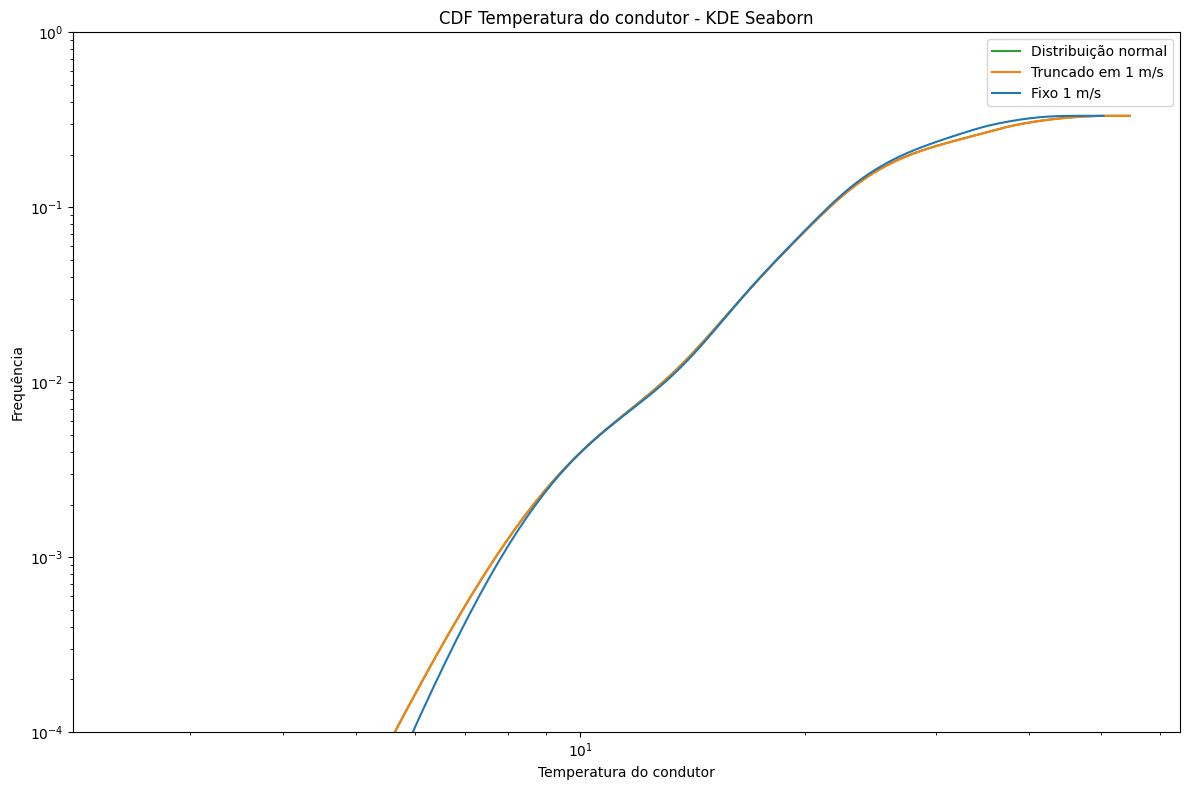

Percentis:
15%:  34.223701722679216 ,  36.67007615608468 ,  36.63509761819514
10%:  36.049101191045594 ,  39.03424276862514 ,  38.989228683302564
1%:  42.1598313302425 ,  47.13162615824853 ,  47.13162615824853


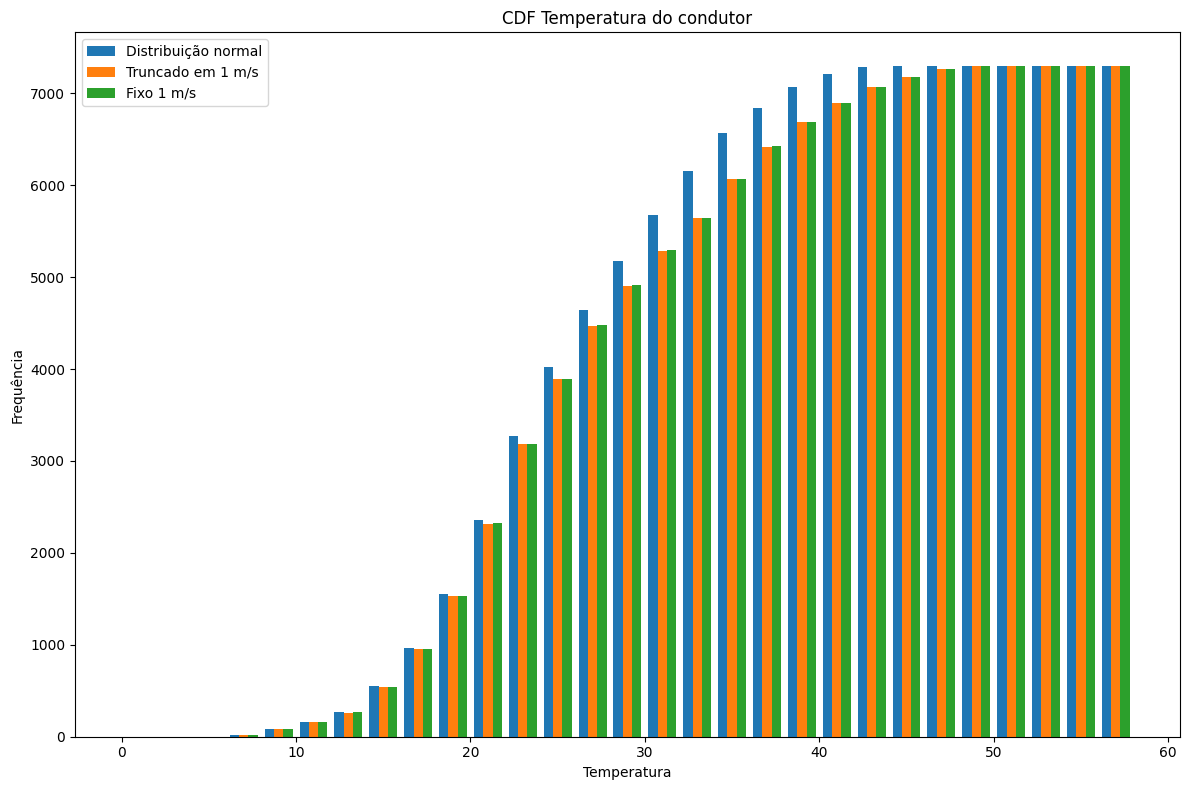

In [5]:

from normaslt import geral
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from statistics import mean 
from math import pi
import pandas as pd
import numpy as np
from scipy import stats
import reliability

# Recarrega as libs para fins de desenvolvimento
import importlib
importlib.reload(geral)

def plot_geolocation():
    # Create a new map with a specific projection (e.g., Mercator)
    map = Basemap(projection='merc', llcrnrlat=-24, urcrnrlat=-21, llcrnrlon=-56, urcrnrlon=-53, lat_ts=40, resolution='i')

    # Draw coastlines, countries, and states
    map.drawcoastlines()
    map.drawcountries()
    map.drawstates()
    map.bluemarble()

    df1, lat1, long1 = geral.readEstacao('Ivinhema', 2023, 2023)
    df2, lat2, long2 = geral.readEstacao('Juti', 2023, 2023)
    df3, lat3, long3 = geral.readEstacao('Dourados', 2023, 2023)
    df4, lat4, long4 = geral.readEstacao('Rio Brilhante', 2023, 2023)
    print(df1)
    latm = mean([lat1, lat2, lat3, lat4])
    longm = mean([long1, long2, long3, long4])
    x1, y1 = map(long1, lat1)
    x2, y2 = map(long2, lat2)
    x3, y3 = map(long3, lat3)
    x4, y4 = map(long4, lat4)
    xm, ym = map(longm, latm)
    map.plot(x1, y1, 'ro', markersize=8)
    map.plot(x2, y2, 'ro', markersize=8)
    map.plot(x3, y3, 'ro', markersize=8)
    map.plot(x4, y4, 'ro', markersize=8)
    map.plot(xm, ym, 'bo', markersize=8)
    plt.show()
    dfAmp = pd.DataFrame()
    # Ver como a média trata NaN
    dfAmp['tMed'] = (df1['tMed'] + df2['tMed'] + df3['tMed'] + df4['tMed'])/4
    print('Porcentagem de NaN dos dataframes:')
    print(df1.isna().sum()/len(df1) * 100)
    print(dfAmp['tMed'].isna().sum()/len(dfAmp['tMed']) * 100)
    fig, ax = plt.subplots(1,1)
    ax.hist(dfAmp['tMed'], bins=np.arange(10., 40., 1.), density=True);
    dist = stats.norm
    res = stats.fit(dist, dfAmp['tMed'][np.isfinite(dfAmp['tMed'])], [(0, 40), (0.5, 5)])
    x = np.linspace(10, 40, 100)
    ax.plot(x, stats.norm.pdf(x, *res.params))
    plt.xlabel('Temperatura')
    plt.ylabel('Frequência')
    plt.title('Temperatura média do ar')
    plt.show()
    dfAmp['vMed'] = (df1['ventoHor'] + df2['ventoHor'] + df3['ventoHor'] + df4['ventoHor'])/4
    fig, ax = plt.subplots(1,1)
    ax.hist(dfAmp['vMed'], bins=np.arange(0, 5, 0.2), density=True);
    dist = stats.weibull_min
    res = stats.fit(dist, dfAmp['vMed'][np.isfinite(dfAmp['vMed'])], [(0, 10), (0.1, 2), (0.1, 10)])
    x = np.linspace(0, 5, 100)
    ax.plot(x, stats.weibull_min.pdf(x, *res.params))
    plt.xlabel('Velocidade (m/s)')
    plt.ylabel('Frequência')
    plt.title('Velocidade do vento horária')
    plt.show()
    dfAmp['radMed'] = (df1['rad'] + df2['rad'] + df3['rad'] + df4['rad'])/4

    # Hipótese 1: vento conforme estatśitica

    dfAmp['tCond'] = dfAmp.apply(ampacDF, axis=1)
    print(dfAmp)
    dft = pd.DataFrame()
    dft['1'] = dfAmp['tCond']

    # Hipótese 2: vento saturado em 1 m/s
    dfAmp['vMed'][dfAmp['vMed'] > 1.] = 1.
    fig, ax = plt.subplots(1,1)
    ax.hist(dfAmp['vMed'], bins=np.arange(0, 5, 0.2), density=True);
    plt.xlabel('Velocidade (m/s)')
    plt.ylabel('Frequência')
    plt.title('Velocidade do vento horária')
    plt.show()
    dfAmp['tCond'] = dfAmp.apply(ampacDF, axis=1)
    dft['2'] = dfAmp['tCond']

    # Hipótese 2: vento constante 1 m/s
    dfAmp['vMed'] = 1.
    dfAmp['tCond'] = dfAmp.apply(ampacDF, axis=1)
    dft['3'] = dfAmp['tCond']

    fig, ax = plt.subplots(1,1)
    ax.hist(dft, bins=np.arange(0., 60., 2.), density=True);
    plt.xlabel('Temperatura')
    plt.ylabel('Frequência')
    plt.title('PDF Temperatura do condutor')
    plt.legend(['Distribuição normal', 'Truncado em 1 m/s', 'Fixo 1 m/s'])
    plt.show()

    # Teste KDE Seaborn
    fig, ax = plt.subplots(1,1)
    sns.kdeplot(dft, fill=True)
    plt.xlabel('Temperatura do condutor')
    plt.ylabel('Frequência')
    plt.title('PDF Temperatura do condutor - KDE Seaborn')
    plt.legend(['Distribuição normal', 'Truncado em 1 m/s', 'Fixo 1 m/s'])
    plt.show()    
    
    fig, ax = plt.subplots(1,1)
    sns.kdeplot(dft, cumulative=True)
    plt.xlabel('Temperatura do condutor')
    plt.ylabel('Frequência')
    plt.xscale('log')
    plt.yscale("log")
    plt.ylim([1e-4, 1])
    plt.title('CDF Temperatura do condutor - KDE Seaborn')
    plt.legend(['Distribuição normal', 'Truncado em 1 m/s', 'Fixo 1 m/s'])
    plt.show()

    print('Percentis:')
    print('15%: ', np.nanpercentile(dft['1'], 85), ', ', np.nanpercentile(dft['2'], 85), ', ', np.nanpercentile(dft['3'], 85))
    print('10%: ', np.nanpercentile(dft['1'], 90), ', ', np.nanpercentile(dft['2'], 90), ', ', np.nanpercentile(dft['3'], 90))
    print('1%: ', np.nanpercentile(dft['1'], 99), ', ', np.nanpercentile(dft['2'], 99), ', ', np.nanpercentile(dft['3'], 99))

    fig, ax = plt.subplots(1,1)
    ax.hist(dft, bins=np.arange(0., 60., 2.), cumulative=True);
    plt.xlabel('Temperatura')
    plt.ylabel('Frequência')
    plt.title('CDF Temperatura do condutor')
    plt.legend(['Distribuição normal', 'Truncado em 1 m/s', 'Fixo 1 m/s'])
    plt.show()   


def ampacDF(row):
    if row.isnull().any():
        return None
    cabo = geral.dbCabo.CAA_RAIL
    amp = 1000. # TODO separar por corrente nominal e emergência
    alt = 20.
    angVento = pi/4 # sendo conservador em não assumir incidência a 90°?
    return geral.tempCondutorCigre(amp, row['vMed'], angVento, row['tMed'], row['radMed'], alt, cabo)

plot_geolocation()